In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline2
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('test2_x.csv')
data.drop(['Unnamed: 0'], axis=1, inplace = True)
data.head(10000)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100
0,0.472198,0.814673,0.508054,0.428195,-0.225217,-0.090697,-0.641026,-0.562219,-1.138731,-0.870165,...,-0.599349,-0.869421,-0.173758,-0.735021,-0.159860,-1.258737,0.478989,-0.302251,-0.390621,-0.208780
1,-1.107982,-0.687268,-1.200568,-0.537770,-0.694189,-0.535325,-0.537710,-0.438322,-0.558795,-0.562028,...,0.564197,2.144724,-2.132681,0.605654,-0.185548,-0.801314,0.902384,2.100092,1.156957,-1.737343
2,1.166438,1.738013,1.098288,0.019219,0.562969,1.226386,0.946318,0.722250,0.819956,0.993657,...,-0.160396,0.695094,1.229701,0.102480,2.963492,1.034756,0.369441,0.084411,0.339111,-2.625716
3,-0.563236,-0.078790,-0.394598,0.214797,0.505561,-0.267894,1.460976,1.326120,1.108418,1.858554,...,-0.166195,0.441354,-0.155196,0.645871,0.056369,0.384915,1.541427,1.011580,-1.932349,-1.348573
4,-1.033327,-1.945248,-1.003806,-0.486660,-0.068143,-0.538643,-0.538708,-0.187147,-0.677447,-0.361755,...,1.351931,-0.374429,-1.488392,-0.654129,2.830028,-0.640464,0.210899,0.345517,0.681851,-1.597274
5,-0.040033,0.802475,0.119834,0.720263,-0.078348,0.383599,0.293392,0.837373,0.281779,0.005346,...,-0.008806,0.054133,-0.648475,1.672718,-0.861844,-1.812935,-0.394283,2.689288,0.618006,-0.953959
6,-1.361287,-0.693844,-0.968490,0.887857,1.331708,0.245168,0.817169,0.125653,0.616200,0.295075,...,2.020155,-1.246400,0.371280,-2.806818,-1.839544,0.483636,-1.188781,2.251729,0.025929,-1.632624
7,0.174725,0.050394,-0.170249,-0.306279,-0.519650,-0.096783,-0.445378,-0.103415,-0.220122,-0.389668,...,-0.081590,0.136742,0.135141,-3.159823,-1.446426,-0.532801,2.416412,-1.422331,-0.940040,0.534884
8,-0.161189,0.451597,0.129762,0.142553,-0.139195,-0.663920,-0.175001,-0.250866,-0.226868,-0.536204,...,1.701532,-0.022726,-0.720679,-1.284372,1.400756,-0.235180,-1.375123,0.766873,-0.565425,1.631226
9,0.044661,-0.215433,0.095977,0.140014,0.104349,0.628257,0.068806,-0.226088,-0.470794,-0.186974,...,0.352363,0.936901,1.188285,-0.903302,2.185108,0.172461,0.654649,0.739864,-1.436103,1.742945


In [3]:
data.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41',
       'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51',
       'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61',
       'P62', 'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71',
       'P72', 'P73', 'P74', 'P75', 'P76', 'P77', 'P78', 'P79', 'P80', 'P81',
       'P82', 'P83', 'P84', 'P85', 'P86', 'P87', 'P88', 'P89', 'P90', 'P91',
       'P92', 'P93', 'P94', 'P95', 'P96', 'P97', 'P98', 'P99', 'P100'],
      dtype='object')

In [4]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel(("x").format(feature))
    plt.ylabel("Y")
    plt.show()

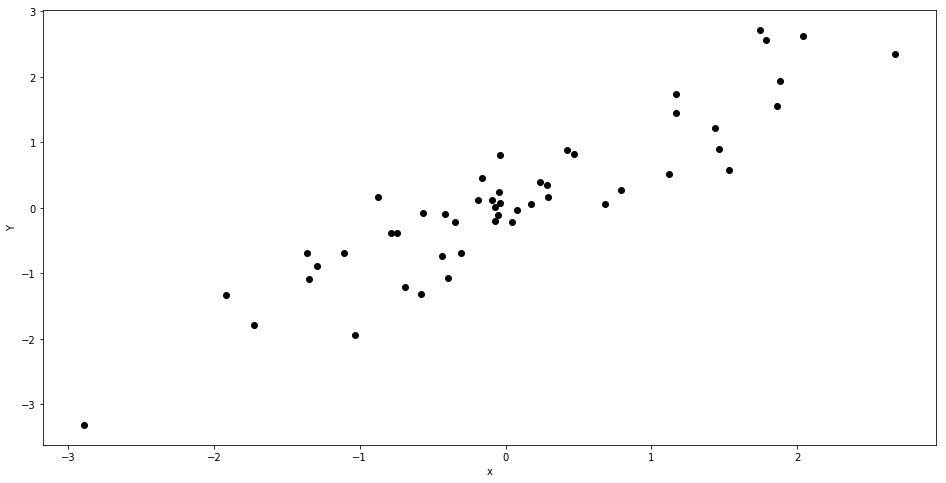

In [5]:
scatter_plot('P1', 'P2')

In [6]:
X, y, coef = make_regression(n_samples=306, n_features=8000, 
                             n_informative=50,noise=0.1, 
                             shuffle=True, coef=True, 
                             random_state=42)
# X : array of shape (input values)
# y : array of shape (output values)
# coef : array of shape (coefficient of the underlying liner model.
                        #will return if coef is true)

In [7]:
X /= np.sum(X**2, axis=0)

In [8]:
alpha = 0.1
g = lambda w: np.sqrt(np.abs(w))
gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

In [9]:
n_samples, n_features = X.shape
p_obj = lambda w: 1. / (2 * n_samples) * np.sum(y - np.dot(X,w)) ** 2 \
                    + alpha * np.sum(g(w))

In [10]:
weights = np.ones(n_features)
n_lasso_iterations = 10

In [11]:
for k in range(n_lasso_iterations):
    X_w = X / weights[np.newaxis, :]
    clf = Lasso(alpha=alpha, fit_intercept=False)
    clf.fit(X_w, y)
    coef_ = clf.coef_ / weights
    weights = gprime(coef_)
    print (p_obj(coef_))

6238.653700060725
1407.7287943375973
1275.909441630419
1267.8505526186914
1267.0301245312448
1266.8966508111985
1266.8716712470984
1266.8665934458331
1266.8654947960395
1266.865245642964


In [12]:
print (np.mean((clf.coef_ != 0.0) == (coef != 0.0)))

0.994625
